<a href="https://colab.research.google.com/github/Evelynrodrigues28/chellengedatascience/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:

import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f"Faturamento da Loja 1: R${faturamento_loja1:.2f}")
print(f"Faturamento da Loja 2: R${faturamento_loja2:.2f}")
print(f"Faturamento da Loja 3: R${faturamento_loja3:.2f}")
print(f"Faturamento da Loja 4: R${faturamento_loja4:.2f}")

# Faturamento total
faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print(f"Faturamento Total: R${faturamento_total:.2f}")

Faturamento da Loja 1: R$1534509.12
Faturamento da Loja 2: R$1488459.06
Faturamento da Loja 3: R$1464025.03
Faturamento da Loja 4: R$1384497.58
Faturamento Total: R$5871490.79


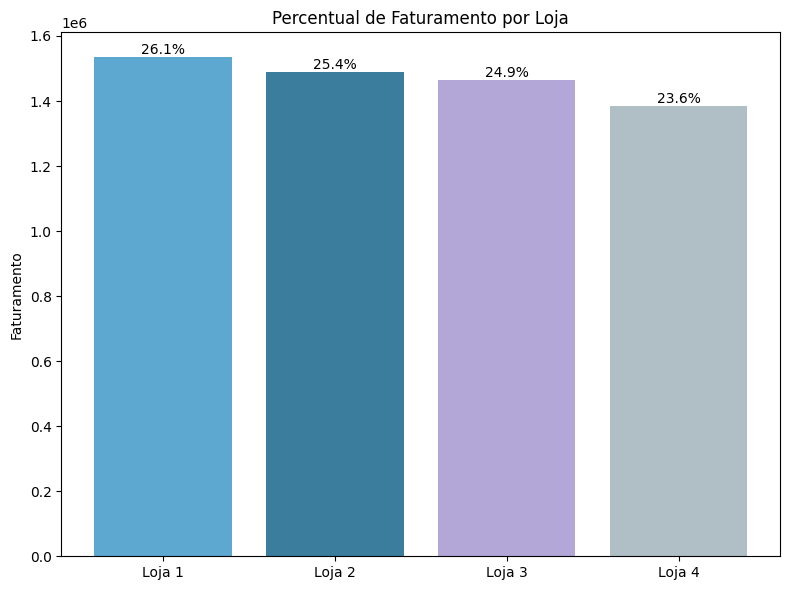

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de barras
labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
valores = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
faturamento_total = sum(valores)
percentuais = [(valor / faturamento_total) * 100 for valor in valores]
cores_inverno = ['#5DA8D1', '#3A7D9D', '#B3A7D8', '#B0BEC5']  # Azul claro, Azul escuro, Roxo claro, Cinza claro
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, valores, color=cores_inverno)
for bar, percentual in zip(bars, percentuais):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{percentual:.1f}%', ha='center', va='bottom')

plt.title('Percentual de Faturamento por Loja')
plt.ylabel('Faturamento')

plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [ ]:
print("Loja 1:")
print(loja["Categoria do Produto"].value_counts(), "\n")

print("Loja 2:")
print(loja2["Categoria do Produto"].value_counts(), "\n")

print("Loja 3:")
print(loja3["Categoria do Produto"].value_counts(), "\n")

print("Loja 4:")
print(loja4["Categoria do Produto"].value_counts(), "\n")


Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64 

Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64 

Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64 

Loja 4:
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer  

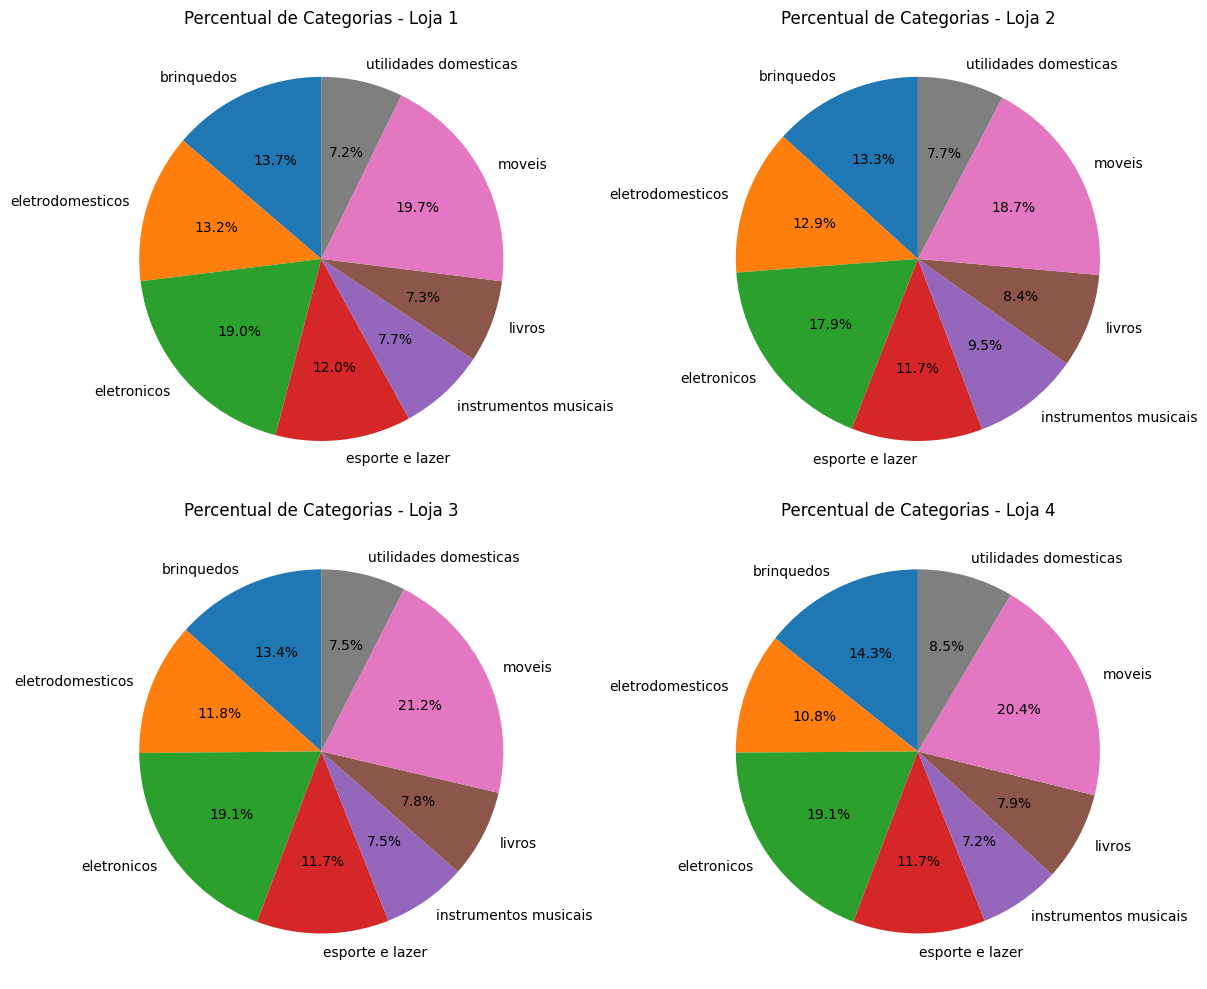

In [ ]:
# Calculando os value_counts para cada loja
import matplotlib.pyplot as plt

dados_lojas = pd.DataFrame({
    "Loja 1": loja["Categoria do Produto"].value_counts(),
    "Loja 2": loja2["Categoria do Produto"].value_counts(),
    "Loja 3": loja3["Categoria do Produto"].value_counts(),
    "Loja 4": loja4["Categoria do Produto"].value_counts()
})

# Gráfico de pizza para cada loja
num_lojas = len(dados_lojas.columns)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, loja in enumerate(dados_lojas.columns):
    valores = dados_lojas[loja].values
    labels = dados_lojas[loja].index
    axes[i].pie(valores, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Percentual de Categorias - {loja}')

plt.tight_layout()
plt.show()




# 3. Média de Avaliação das Lojas

In [ ]:
loja = pd.read_csv(url)

# Calculando a média diretamente pela coluna "Avaliação da compra"
media_loja1 = loja["Avaliação da compra"].mean()
media_loja2 = loja2["Avaliação da compra"].mean()
media_loja3 = loja3["Avaliação da compra"].mean()
media_loja4 = loja4["Avaliação da compra"].mean()

# Exibindo as médias

print(f"Média da Loja 1: {media_loja1:.2f}")
print(f"Média da Loja 2: {media_loja2:.2f}")
print(f"Média da Loja 3: {media_loja3:.2f}")
print(f"Média da Loja 4: {media_loja4:.2f}")


# Calculando a média geral entre todas as lojas
media_geral = (media_loja1 + media_loja2 + media_loja3 + media_loja4) / 4
print(f"Média geral entre as lojas: {media_geral:.2f}")

Média da Loja 1: 3.98
Média da Loja 2: 4.04
Média da Loja 3: 4.05
Média da Loja 4: 4.00
Média geral entre as lojas: 4.01


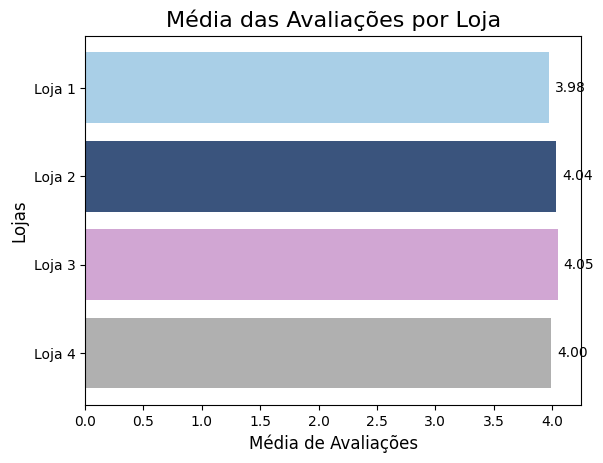

In [ ]:
import matplotlib.pyplot as plt

# Configurando os dados para o gráfico
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
medias = [media_loja1, media_loja2, media_loja3, media_loja4]

cores_inverno = ["#A9CFE7", "#3A547D", "#D1A6D3", "#B0B0B0"]

# Criando o gráfico de barras horizontais com as cores ajustadas
plt.barh(lojas, medias, color=cores_inverno)

# Invertendo o eixo y para garantir que as lojas apareçam na ordem correta (1 a 4)
plt.gca().invert_yaxis()

# Adicionando os valores das médias ao lado de cada barra
for i, media in enumerate(medias):
    plt.text(media + 0.05, i, f"{media:.2f}", va='center', fontsize=10)

plt.title("Média das Avaliações por Loja", fontsize=16)
plt.xlabel("Média de Avaliações", fontsize=12)
plt.ylabel("Lojas", fontsize=12)

plt.show()


# 4. Produtos Mais e Menos Vendidos

In [25]:
loja = pd.read_csv(url)

# Calculando os value_counts para cada loja
dados_lojas = pd.DataFrame({

    "Loja 1": loja["Produto"].value_counts(),
    "Loja 2": loja2["Produto"].value_counts(),
    "Loja 3": loja3["Produto"].value_counts(),
    "Loja 4": loja4["Produto"].value_counts()
})

print(dados_lojas)



                             Loja 1  Loja 2  Loja 3  Loja 4
Produto                                                    
Assistente virtual               40      38      39      50
Bateria                          53      61      41      48
Bicicleta                        54      45      52      45
Blocos de montar                 56      54      35      54
Bola de basquete                 55      42      50      50
Bola de vôlei                    42      46      48      48
Boneca bebê                      40      48      39      48
Cadeira de escritório            46      49      46      40
Cama box                         44      47      46      62
Cama king                        44      45      56      56
Carrinho controle remoto         52      47      52      55
Celular ABXY                     33      41      44      39
Celular Plus X42                 49      55      46      48
Ciência de dados com python      39      43      46      38
Copo térmico                     54     

In [26]:

# Criar o DataFrame com as frequências de produtos
dados_lojas = pd.DataFrame({
    "Loja 1": loja["Produto"].value_counts(),
    "Loja 2": loja2["Produto"].value_counts(),
    "Loja 3": loja3["Produto"].value_counts(),
    "Loja 4": loja4["Produto"].value_counts()
})

# Mostrar os 5 produtos menos vendidos e suas quantidades para cada loja
print("Top 5 produtos MENOS vendidos - Loja 1:")
print(dados_lojas["Loja 1"].nsmallest(5), "\n")

print("Top 5 produtos menos vendidos - Loja 2:")
print(dados_lojas["Loja 2"].nsmallest(5), "\n")

print("Top 5 produtos menos vendidos - Loja 3:")
print(dados_lojas["Loja 3"].nsmallest(5), "\n")

print("Top 5 produtos menos vendidos - Loja 4:")
print(dados_lojas["Loja 4"].nsmallest(5), "\n")



Top 5 produtos MENOS vendidos - Loja 1:
Produto
Celular ABXY                   33
Headset                        33
Panela de pressão              35
Pandeiro                       36
Ciência de dados com python    39
Name: Loja 1, dtype: int64 

Top 5 produtos menos vendidos - Loja 2:
Produto
Jogo de tabuleiro    32
Impressora           34
Mesa de jantar       34
Poltrona             35
Fone de ouvido       37
Name: Loja 2, dtype: int64 

Top 5 produtos menos vendidos - Loja 3:
Produto
Blocos de montar    35
Jogo de copos       36
Micro-ondas         36
Mochila             36
Copo térmico        38
Name: Loja 3, dtype: int64 

Top 5 produtos menos vendidos - Loja 4:
Produto
Guitarra                       33
Guarda roupas                  34
Violão                         37
Ciência de dados com python    38
Geladeira                      38
Name: Loja 4, dtype: int64 



In [27]:
# Criar o DataFrame com as frequências de produtos
dados_lojas = pd.DataFrame({
    "Loja 1": loja["Produto"].value_counts(),
    "Loja 2": loja2["Produto"].value_counts(),
    "Loja 3": loja3["Produto"].value_counts(),
    "Loja 4": loja4["Produto"].value_counts()
})

# Mostrar os 5 produtos MAIS vendidos e suas quantidades para cada loja
print("Top 5 produtos MAIS vendidos - Loja 1:")
print(dados_lojas["Loja 1"].nlargest(5), "\n")

print("Top 5 produtos mais vendidos - Loja 2:")
print(dados_lojas["Loja 2"].nlargest(5), "\n")

print("Top 5 produtos mais vendidos - Loja 3:")
print(dados_lojas["Loja 3"].nlargest(5), "\n")

print("Top 5 produtos mais vendidos - Loja 4:")
print(dados_lojas["Loja 4"].nlargest(5), "\n")


Top 5 produtos MAIS vendidos - Loja 1:
Produto
Guarda roupas         60
Micro-ondas           60
TV Led UHD 4K         60
Secadora de roupas    58
Blocos de montar      56
Name: Loja 1, dtype: int64 

Top 5 produtos mais vendidos - Loja 2:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Pandeiro                    58
Violão                      58
Name: Loja 2, dtype: int64 

Top 5 produtos mais vendidos - Loja 3:
Produto
Kit banquetas      57
Cama king          56
Mesa de jantar     56
Cômoda             55
Jogo de panelas    55
Name: Loja 3, dtype: int64 

Top 5 produtos mais vendidos - Loja 4:
Produto
Cama box                    62
Faqueiro                    59
Cama king                   56
Dashboards com Power BI     56
Carrinho controle remoto    55
Name: Loja 4, dtype: int64 



# 5. Frete Médio por Loja


In [ ]:

# Calcular o frete médio para cada loja
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

print(f"\nFrete Médio Loja 1: R${frete_medio_loja1:.2f}")
print(f"Frete Médio Loja 2: R${frete_medio_loja2:.2f}")
print(f"Frete Médio Loja 3: R${frete_medio_loja3:.2f}")
print(f"Frete Médio Loja 4: R${frete_medio_loja4:.2f}")



Frete Médio Loja 1: R$34.69
Frete Médio Loja 2: R$33.62
Frete Médio Loja 3: R$33.07
Frete Médio Loja 4: R$31.28


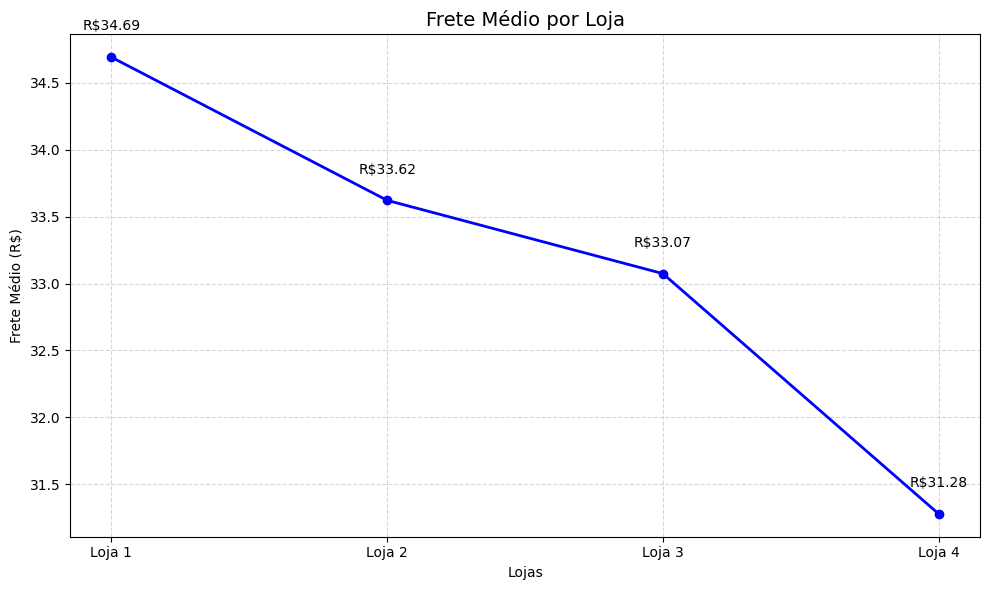

In [ ]:
# Criando o gráfico de linhas

import matplotlib.pyplot as plt

nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
valores_frete_medio = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
plt.figure(figsize=(10, 6))
plt.plot(nomes_lojas, valores_frete_medio, marker='o', linestyle='-', color='b', label='Frete Médio', linewidth=2)
plt.title('Frete Médio por Loja', fontsize=14)
plt.xlabel('Lojas')
plt.ylabel('Frete Médio (R$)')
for i, valor in enumerate(valores_frete_medio):
    plt.text(nomes_lojas[i], valor + 0.2, f'R${valor:.2f}', ha='center', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




# Detalhamento da Analise


#1. Faturamento Total por Loja

Faturamento da Loja 1: R$1.534,509,12
Faturamento da Loja 2: R$1.488,459,06
Faturamento da Loja 3: R$1.464,025,03
Faturamento da Loja 4: R$1.384,497,58

Observação:

A Loja 1 tem o maior faturamento, Já a Loja 4 apresenta o menor faturamento.

2. Vendas por Categoria


Loja 1: Móveis : 465 vendas

Loja 2: Móveis : 442 vendas

Loja 3: Móveis : 499 vendas

Loja 4: Móveis : 480 vendas

Observação:

A categoria Móveis é a mais vendida em todas as lojas, mostrando uma tendência consistente. A Loja 3 lidera em unidades vendidas dentro dessa categoria, enquanto a Loja 2 apresenta o menor volume.

3. Avaliação Média dos Clientes por Loja

Foi avaliada a nota média dada pelos clientes a cada loja:

Loja 1: 3,98 / 5

Loja 2: 4,04 / 5

Loja 3: 4,05 / 5

Loja 4: 4,00 / 5

Observação:

A Loja 1 possui a nota mais baixa, enquanto a Loja 3 tem a melhor avaliação.

4. Produtos Mais e Menos Vendidos

Foram analisados os produtos com maior e menor volume de vendas:

Loja 1:

Mais vendido: Guarda Roupa = 60 unidades

Menos vendido: Celular ABXY  = 33 unidades

Loja 2:

Mais vendido: Iniciando em programação = 65 unidades

Menos vendido: Jogo de tabuleiro = 32 unidades

Loja 3:

Mais vendido: kit banquetas = 57 unidades

Menos vendido: Blocos de montar = 35 unidades

Loja 4:

Mais vendido: Cama box = 62 unidades

Menos vendido: Guitarra = 33 unidades

Observação:

A Loja 2 apresenta o produto menos vendido, com o menor número de unidades (32), o que pode indicar um problema de rotatividade de estoque ou falta de demanda por alguns produtos.

As Lojas 1 e 4 têm produtos com 33 unidades vendidas como os menos vendidos, enquanto a Loja 3 tem o maior número de unidades para seu produto menos vendido (35).

5. Custo Médio de Envio por Loja


Loja 1: R$ 34,69

Loja 2: R$ 33,62

Loja 3: R$ 33,07

Loja 4: R$ 31,28

Observação:

A Loja 4 apresenta o menor custo de envio médio.

Conclusão e recomendação

A Loja 4 é a mais indicada para ser vendida, dado seu baixo desempenho financeiro, menor faturamento, e classificação inferior em vendas comparado às outras lojas. Embora tenha algumas vantagens, como o menor custo de envio, essas não são suficientes para justificar a manutenção da unidade.